<a href="https://colab.research.google.com/github/SimonDelgado/Procesamiento-Digital-Multimedia/blob/main/Actividad%203/Actividad_3_DelgadoSimon_202840051.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 3</h2></center>
<center><h3>Fundamentos</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Simón Delgado</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Generar una imagen de una función trigronométrica (función bidimensional)
### **Sinusoidal Gratings**

<p align="justify">
Se generará una señal sinusoidal simple la cual será procesada para generar una imagen.


In [109]:
import numpy as np

In [110]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'tiempo')

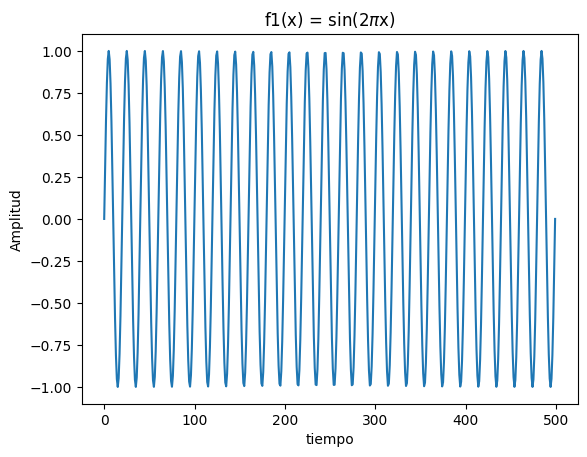

In [111]:
def f1(x):
  return np.sin(50 * np.pi * x)

N = 500 # Número de muestras
T = 1 / 500 # tiempo entre muestras
x = np.linspace(0, N*T, N) # Espacio de las muestras
plt.plot(f1(x))
plt.title('f1(x) = sin(2$\pi$x)')
plt.ylabel('Amplitud')
plt.xlabel('tiempo')

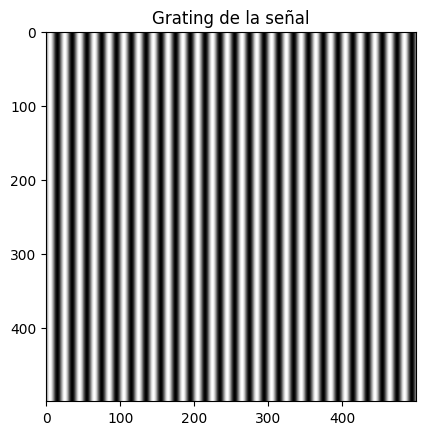

In [112]:
X, Y = np.meshgrid(x, x, indexing='xy') # Se utiliza la herramienta .meshgrid para transformar un espacio de 1-D a 2-D
grating = f1(X) # Se le asigna X a la señal dado que se quiere en sentido horizontal

plt.set_cmap('gray')
plt.imshow(grating)
plt.title('Grating de la señal')
plt.show()

# primero se le enterga X e Y, luego la sinusoidal con argumento X e Y

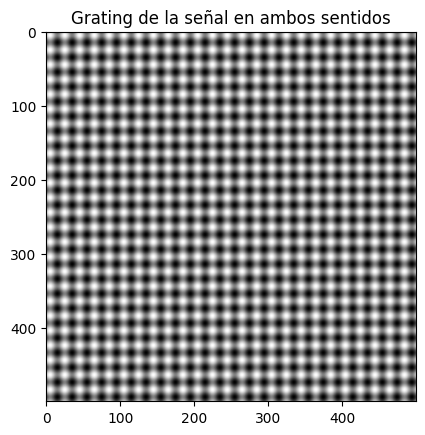

In [113]:
X, Y = np.meshgrid(x, x, indexing='xy')
grating = f1(X) + f1(Y) # Se suma la señal en sentido vertical y se obtiene otra imagen

plt.set_cmap('gray')
plt.imshow(grating)
plt.title('Grating de la señal en ambos sentidos')
plt.show()

## 2. Generar señales


### 2.1 Genera una señal.

$$f(x)=sin(2\pi x)+cos(4\pi x)$$

Text(0.5, 0, 'tiempo')

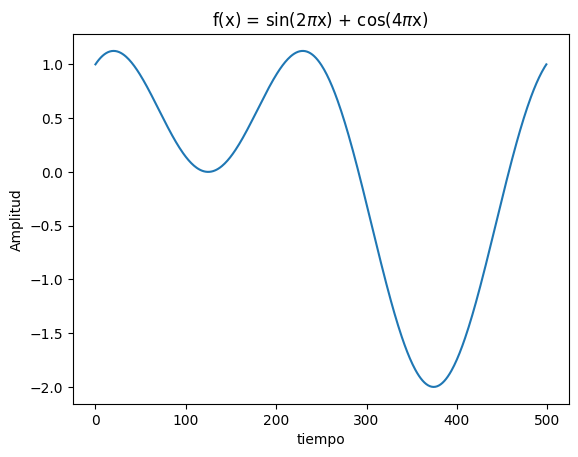

In [114]:
def f2(x):
  return np.sin(2 * np.pi * x) + np.cos(4 * np.pi * x) # frecuencia en terminos de muestras x seg


plt.plot(f2(x))
plt.title('f(x) = sin(2$\pi$x) + cos(4$\pi$x)')
plt.ylabel('Amplitud')
plt.xlabel('tiempo')

### 2.2 Genera otra señal con ruido gaussiano añadido.

La ecuación de distribución Gaussiana es la siguiente:

$$p(x)=\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^{2}}$$

Con $\sigma$ la desviación estandar y $\mu$ el centro.

Se crea un vector aleatorio *r*, el cual es usado como argumento para la ecuación Gaussiana. Se genera la señal de ruido:

In [115]:
r = np.random.random(500)

Text(0.5, 0, 'tiempo')

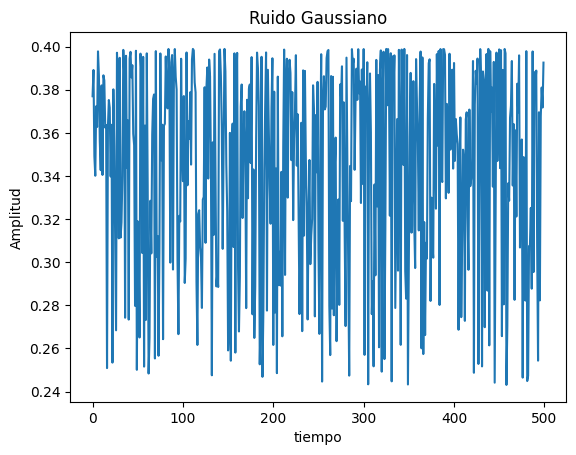

In [116]:
def gauss(u, mu, sigma):
  return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (((u - mu) ** 2) / sigma))

plt.plot(gauss(r, 0, 1))
plt.title('Ruido Gaussiano')
plt.ylabel('Amplitud')
plt.xlabel('tiempo')

Se agrega la señal de ruido a la función 2.1

Text(0, 0.5, 'Amplitud')

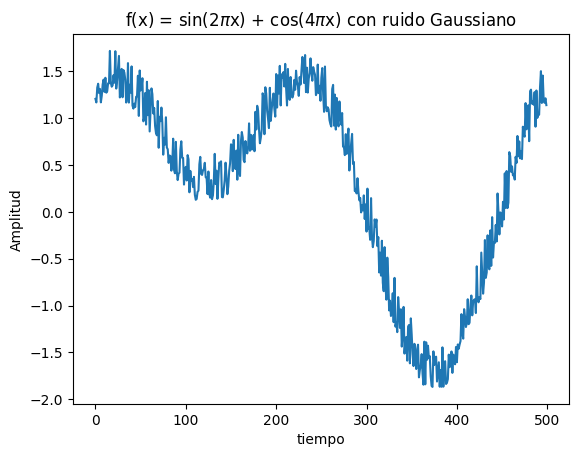

In [117]:
def f_ruido(x):
  return f2(x) + gauss(r, 1.5, 0.5)

plt.plot(f_ruido(x))
plt.title('f(x) = sin(2$\pi$x) + cos(4$\pi$x) con ruido Gaussiano')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')

## 3. Análisis en el dominio de Fourier
<p align="justify">



### 3.1 Obtenga la transformada de Fourier para los casos anteriores


La ecuación para la transformada discreta de Fourier está definida como:

$$X(k)=\sum_{i=0}^{N-1}x(i)e^{-j\frac{2\pi ki}{N}}$$

En el siguiente bloque donde se desarrolla el algoritmo para la DFT, $x(i)=f(x)$, $i=n$.

Text(0, 0.5, 'Amplitud')

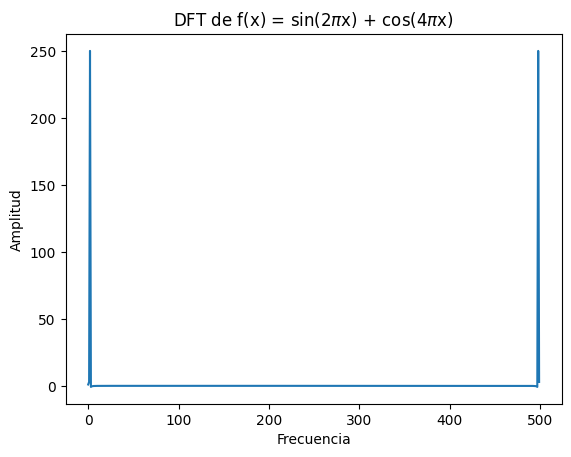

In [118]:
def DFT1(x): # se define transformada de Fourier discreta
  N = 500 # número de muestras
  n = np.arange(N) # muestras, vector fila
  k = n.reshape((N, 1)) # coeficientes, vector columna
  e = np.exp(-2j * np.pi * k * n / N)
  X = np.dot(e, f2(x)) # producto punto
  return X

plt.plot(DFT1(x))
plt.title('DFT de f(x) = sin(2$\pi$x) + cos(4$\pi$x)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

Para mejor visualización de lo que ocurre se limita el eje x.

Text(0, 0.5, 'Amplitud')

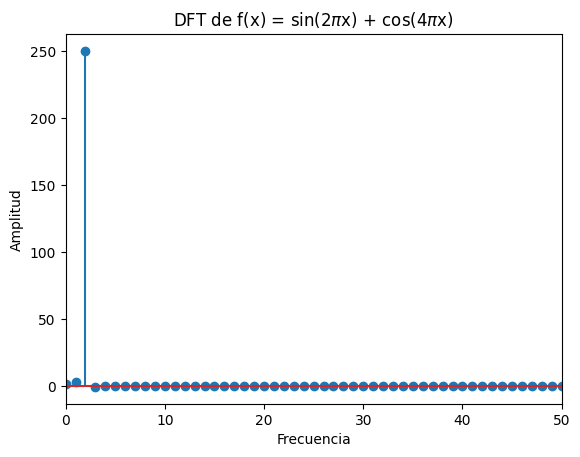

In [119]:
plt.stem(DFT1(x))
plt.xlim([0, 50])
plt.title('DFT de f(x) = sin(2$\pi$x) + cos(4$\pi$x)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

Sabiendo que cada punto equivale a un entero, la frecuencia dominante es 2 [Hz].

Se aplica DFT a la señal con ruido:

Text(0, 0.5, 'Amplitud')

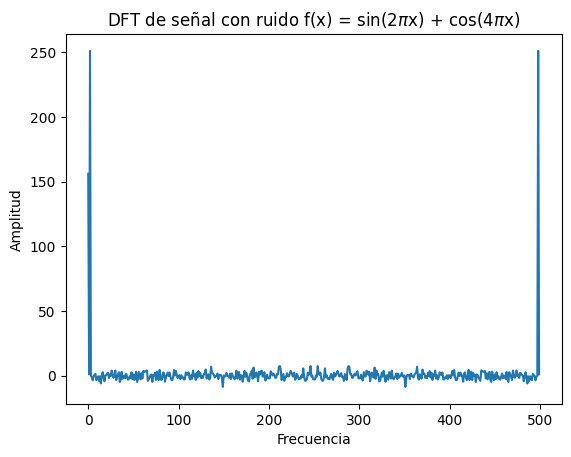

In [120]:
def DFT2(x):
  N = 500
  n = np.arange(N)
  k = n.reshape((N, 1))
  e = np.exp(-2j * np.pi * k * n / N)
  X = np.dot(e, f_ruido(x))
  return X

plt.plot(DFT2(x))
plt.title('DFT de señal con ruido f(x) = sin(2$\pi$x) + cos(4$\pi$x)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

Text(0, 0.5, 'Amplitud')

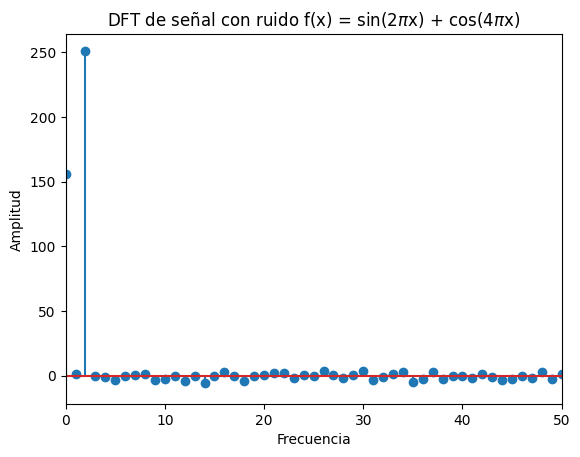

In [121]:
plt.stem(DFT2(x))
plt.xlim([0, 50])
plt.title('DFT de señal con ruido f(x) = sin(2$\pi$x) + cos(4$\pi$x)')
plt.xlabel('Frecuencia')
plt.ylabel('Amplitud')

Se aprecia que la misma frecuencia es la dominante, pero se agregan pequeños valores de frecuencias aleatorios dado el ruido.

### 3.2 Obten un resultado Normalizado

In [122]:
max_1 = DFT1(x).max()
norma_1 = DFT1(x) / abs(max_1)

Text(0.5, 1.0, 'DFT de la señal normalizada sin ruido')

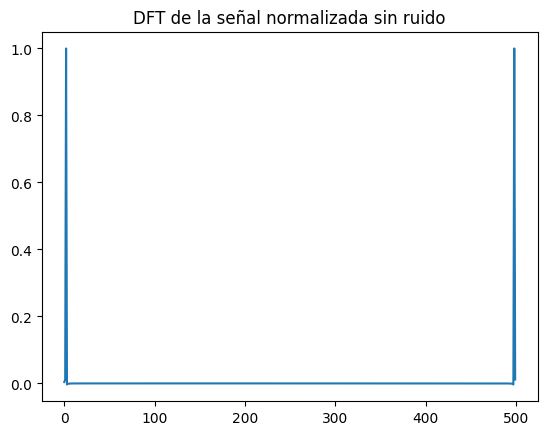

In [123]:
plt.plot(norma_1)
plt.title('DFT de la señal normalizada sin ruido')

In [124]:
max_2 = DFT2(x).max()
norma_2 = DFT2(x) / abs(max_2)

Text(0.5, 1.0, 'DFT de la señal normalizada con ruido')

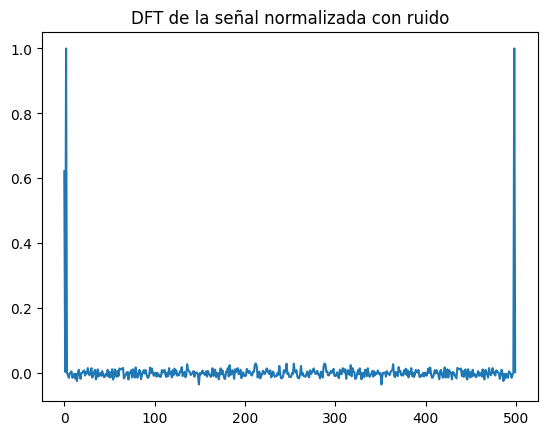

In [125]:
plt.plot(norma_2)
plt.title('DFT de la señal normalizada con ruido')

### 3.3 Encuentra la transformada inversa de Fourier
_solo para una señal_

Text(0, 0.5, 'Amplitud')

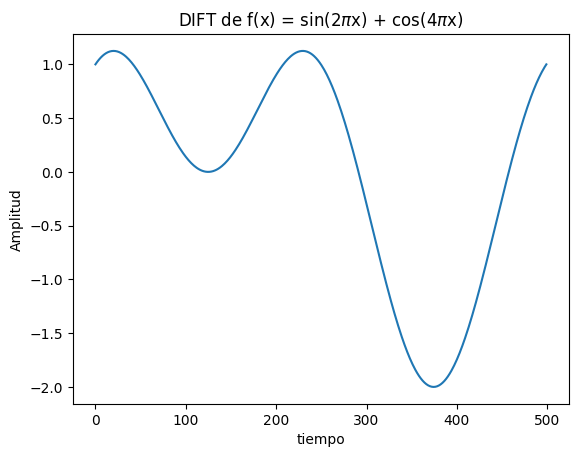

In [126]:
# algoritmo similar, desarrollando la ecuación de manera de pasar de la freceuncia al tiempo

def DIFT1(x): # se define transformada de Fourier inversa discreta
  N = 500 # número de muestras
  n = np.arange(N) # muestras, vector fila
  k = n.reshape((N, 1)) # coeficientes, vector columna
  e = np.exp(2j * np.pi * k * n / N) # se cambió signo del exponente
  X = np.dot(e, DFT1(x)) # producto punto
  return X / N # se divide en N

plt.plot(DIFT1(x))
plt.title('DIFT de f(x) = sin(2$\pi$x) + cos(4$\pi$x)')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')

In [127]:
# plt.imshow(DIFT1(U))

### 3.4 Escriba un algoritmo para la Transformada Discreta de Fourier(DFT) 2-D y muéstrelo
Se presenta la imagen de la señal del punto 2.1:

Text(0.5, 1.0, 'Grating de la señal f2')

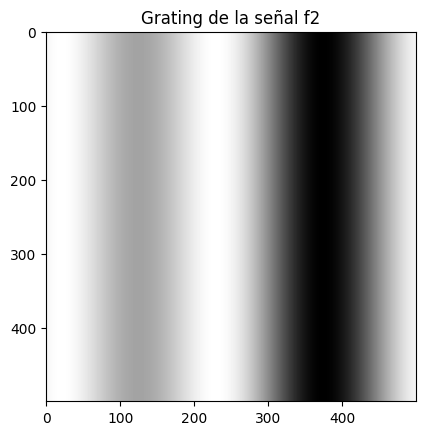

In [128]:
U, V = np.meshgrid(x, x)

plt.set_cmap('gray')
plt.imshow(f2(U))
plt.title('Grating de la señal f2')

Como se vió, su DFT es:

Text(0.5, 1.0, 'DFT de la señal sin ruido')

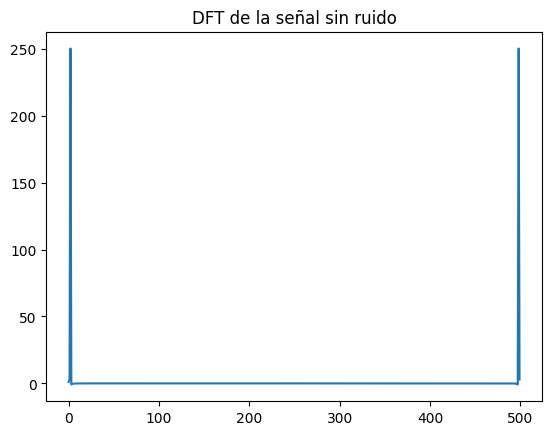

In [129]:
plt.plot(DFT1(x))
plt.title('DFT de la señal sin ruido')

El primer intento se muestra en el siguiente bloque.

Text(0.5, 1.0, 'DFT en 2-D')

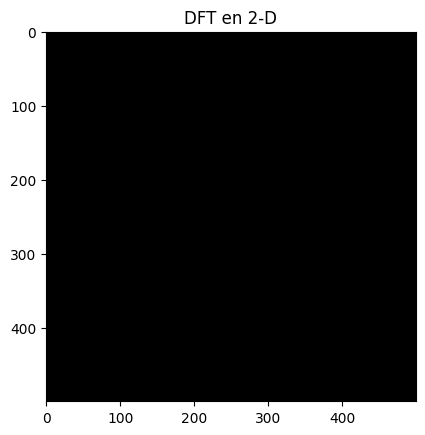

In [130]:
U, V = np.meshgrid(x, x)
gratingFT = DFT1(U)

plt.set_cmap('gray')

plt.imshow(np.abs(gratingFT)) # Se utiliza el valor absoluto ya que son números complejos
plt.title('DFT en 2-D')

Se aprecia una imagen en negro. Se realizó con la herramienta fft y el resultado es el siguiente:

Text(0.5, 1.0, 'DFT en 2-D')

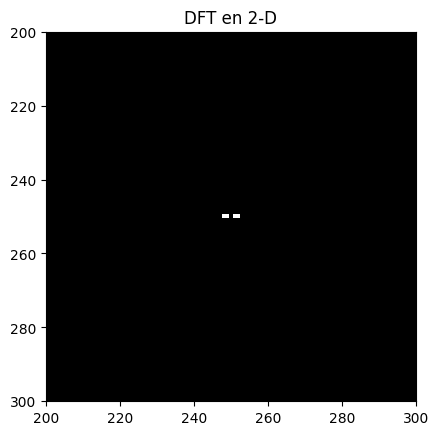

In [131]:
U, V = np.meshgrid(x, x)
gratingFT = f2(U) # Se hará el grating de la onda sin ruido

ft = np.fft.ifftshift(gratingFT) #
ft = np.fft.fft2(ft) #
ft = np.fft.fftshift(ft) # En estas líneas de código se hace la transformada en 2-D de la señal f2 con .fft
plt.set_cmap('gray')
plt.xlim([200, 300])
plt.ylim([300, 200])
plt.imshow(np.abs(ft))
plt.title('DFT en 2-D')


Text(0.5, 1.0, 'DFT con ruido en 2-D')

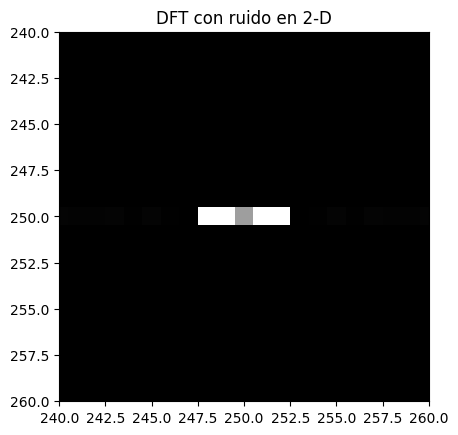

In [132]:
U, V = np.meshgrid(x, x)
gratingFT = f_ruido(U) # Se hará el grating de la onda sin ruido

ft = np.fft.ifftshift(gratingFT) #
ft = np.fft.fft2(ft) #
ft = np.fft.fftshift(ft) # En estas líneas de código se hace la transformada en 2-D de la señal f2 con .fft
plt.set_cmap('gray')
plt.xlim([240, 260])
plt.ylim([260, 240])
plt.imshow(np.abs(ft))
plt.title('DFT con ruido en 2-D')

### 3.5 Explica tus hallazgos

La transformada de Fourier es una herramienta importante para la descomposición de imágenes ya que permite extraer la información en términos de frecuencia para luego generar la señal deseada en términos de tiempo. El ruido introduce frecuencias que distoricionan las señales. El ruido en transformada de Fourier presenta las frecuencias que han sido introducidas a la señal, lo cual es información importante para procesar la señal en aspectos como filtros, para discriminar lo que es información útil.  

## 4. Referencias
<p align="justify">
    


[Sobre Teorema del sampleo]https://ipython-books.github.io/chapter-10-signal-processing/

[Sobre Matplotlib] https://matplotlib.org/stable/gallery/mplot3d/2dcollections3d.html#sphx-glr-gallery-mplot3d-2dcollections3d-py

[2D meshing]https://thepythoncodingbook.com/2021/08/30/2d-fourier-transform-in-python-and-fourier-synthesis-of-images/

[Numerical Methods]https://pythonnumericalmethods.berkeley.edu/notebooks/Index.html